<a href="https://colab.research.google.com/github/marcinwolter/MachineLearning-KISD-2025/blob/main/lecture7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>




#**<font color = "red">Introduction to machine learning</font>**

**Lecture 7**

##**<font color = "green">Generative Adversarial Network (GAN)</font>**
##**<font color = "green">Reinforcement learning</font>**


*16 April 2025*


---

*Marcin Wolter, IFJ PAN*

*e-mail: marcin.wolter@ifj.edu.pl*


---
</center>

#<font color='green'>**Program for today:**



* ###  <font color='red'>Generative Adversarial Networks (GANs): how to generate artificial data?
* ###  <font color='red'>Reinforcement learning: how to train a robot?

<br>


**As always all slides are here:**

*https://github.com/marcinwolter/MachineLearning-KISD-2025*

<br>






---



---



---



# <font color = green> **Generative Adversarial Nets (GANs)**

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_100.png' width=650px>




**Generative Adversarial Nets \(GANs\)** were introduced by Ian Goodfellow and others in 2014\. Yann LeCun called **adversarial training** “the most interesting idea in the last 10 years in ML\.” </span><br>  <span style="color:#000000">[https://arxiv\.org/abs/1406\.2661](https://arxiv.org/abs/1406.2661)</span>

<span style="color:#000000">**GANs** can learn to mimic any distribution of data\. They can be taught to create worlds similar to our own in any domain: images\, music\, speech\, prose\. They are robot artists\!</span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_101.png' width=450px>



<span style="color:#800000"> __Next Rembrandt project 2016__ </span>

<span style="color:#000000">Create automatically a new Rembrandt portrait based on a collection of Rembrandt works:</span>

<span style="color:#000000">[https://www\.nextrembrandt\.com/](https://www.nextrembrandt.com/)</span>  <span style="color:#000000"> </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_102.png' width=450px>

 **“The Next Rembrandt”**, a 2016 project funded by a variety of corporations led by financial services company ING, used AI to generate a new Rembrandt-like painting that was 3D printed and displayed.

---

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Edmond_de_Belamy.png/1920px-Edmond_de_Belamy.png' width=450px>

In 2018, the Obvious artist collective created **“Edmond de Belamy”**, a portrait that evokes what might be called an impressionistic Rembrandt, and which became the first AI painting sold at auction by Christie’s.


#<font color='green'>**How does GAN work?**
###**Blind forger and detective**

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_104.png' width=450px>

* The forger has never seen Mona Lisa\, but gets the judgments of detective and tries to fool him \(i\.e\. paint something that looks like Mona Lisa\)\.

* <span style="color:#000000">They both \(forger and detective\) have to train in parallel \(important\)\, since if detective is to clever the forger will never paint anything acceptable\.</span>

---





#<font color='green'>**Generator and discriminator**

* <span style="color:#000000"> __Discriminative algorithms__ </span>  <span style="color:#000000"> \- classify input data; given the features\, they predict a label or category to which that data belongs \(</span>  <span style="color:#000000"> _signal_ </span>  <span style="color:#000000"> or </span>  <span style="color:#000000"> _background_ </span>  <span style="color:#000000">\)</span>
* <span style="color:#000000"> __Generative algorithms__ </span>  <span style="color:#000000">– do the opposite\, assuming the event is a </span>  <span style="color:#000000"> _signal_ </span>  <span style="color:#000000">\, how likely are these features? </span>
* <span style="color:#000000">A way to distinguish discriminative from generative algorithms is:</span>
  * <span style="color:#000000"> __Discriminative models__ </span>  <span style="color:#000000"> learn the boundary between classes</span>
  * <span style="color:#000000"> __Generative models__ </span>  <span style="color:#000000"> model the distribution of individual classes</span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_103.png' width=350px>


#**How the GAN is built?**

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/Zrzut%20ekranu%202022-04-22%20144540.png' width=650px>

* **Generator** gets a random vector as an input and transforms it into an image.<br>
In **Generative Models**
we try to learn the underlying the distribution
from which our dataset comes from.
* **Discriminator** compares the generated data to the real data.
* **Adversarial Training:**
GANS are made up of two competing networks (adversaries - generator and discriminator)
that are trying beat each other.



<img src='https://www.researchgate.net/profile/Bhaskar_Ghosh3/publication/344544069/figure/fig1/AS:944366453542923@1602165916976/Generative-Adversarial-Network-Architecture-2.jpg' width=650px>

#**Example generator code**

```python
    def __generator(self):
        """ Declare generator """

        model = Sequential()
        model.add(Dense(256, input_shape=(100,)))
        model.add(LeakyReLU(alpha=0.2))  
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(self.width  * self.height * self.channels, activation='tanh'))
        model.add(Reshape((self.width, self.height, self.channels)))

        return model
```



#**Example discriminator code**

```python
    def __discriminator(self):
        """ Declare discriminator """

        model = Sequential()
        model.add(Flatten(input_shape=self.shape))
        model.add(Dense((self.width * self.height * self.channels), input_shape=self.shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(np.int64((self.width * self.height * self.channels)/2)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        return model
```

#**Why LeakyReLu activation function?**



| <img src='https://cdn-media-1.freecodecamp.org/images/2Gt22y40ECfoeueVhbdJxlSxN56ANsdz1Upt' width=250px>  	|   <img src='https://cdn-media-1.freecodecamp.org/images/jnloudDblWrrXgjam9wLcJSIXhCkQsb4WIhz' width=250px>	|
|:-:	|:-:	|
|  ReLu 	|  LeakyReLu 	|



A regular ReLU function works by truncating negative values to 0. This has the effect of blocking the gradients to flow through the network. Instead of the function being zero, leaky ReLUs allow a small negative value to pass through. That is, the function computes the greatest value between the features and a small factor.

Leaky ReLUs represent an attempt to solve the dying ReLU problem. This situation occurs when the neurons get stuck in a state in which ReLU units always output 0s for all inputs. For these cases, the gradients are completely shut to flow back through the network.

This is especially important for GANs since the only way the generator has to learn is by receiving the gradients from the discriminator.

#**How to train a GAN?**

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/Zrzut%20ekranu%202022-04-22%20144714.png' width=650px>

We have to train discriminator to distinguish real and fake data...

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/Zrzut%20ekranu%202022-04-22%20145742.png'  width=650px>

... then train the generator to beat the discriminator.

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/Zrzut%20ekranu%202022-04-22%20145842.png' width=650px>

We have to repeat this cycle many times to train both discriminator and generator in parallel.


#**Losses**

* Discriminator receives images from both the training set and the generator. Each mini-batch we get logits from the discriminator. These are the unscaled values from the model.

* In mini-batches the discriminator receives fake and real images.
Because generator and discriminator train at the same time, GANs also need two optimizers. Each one for minimizing the discriminator and generator’s loss functions respectively.

* We want the discriminator to output probabilities close to 1 for real images and near 0 for fake images. To do that, the discriminator needs two losses. Therefore, the total loss for the discriminator is the sum of these two partial losses. **One for maximizing the probabilities for the real images and another for minimizing the probability of fake images.**




<span style="color:#800000"> __GANs example – hand\-written digits__ </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_105.png' width=650px>

<span style="color:#000000"> __Training set__ </span>  <span style="color:#000000"> – MNIST: hand\-written digits supplied by US post\.</span>

<span style="color:#000000"> __Discriminator__ </span>  <span style="color:#000000"> – convolutional neural network labeling images as real or fake\. </span>

<span style="color:#000000"> __Generator__ </span>  <span style="color:#000000"> \- inverse convolutional network \(while a standard convolutional classifier takes an image and downsamples it to produce a probability\, the generator takes a vector of random noise and upsamples it to an image\)\. </span>

<span style="color:#000000"> _Implementation: Python code using Keras interface and TensorFlow backend\._ </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_106.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_107.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_108.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_109.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1010.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1011.png' width=450px>

<span style="color:#000000">Each cycle digits look more and more realistic\.</span>




---



# <font color='green'> **Code example**

from: https://www.tensorflow.org/tutorials/generative/dcgan

### Setup

In [ ]:
import tensorflow as tf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tf.__version__

'2.15.0'

In [ ]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

### Load and prepare the dataset

You will use the MNIST dataset to train the generator and the discriminator. The generator will generate handwritten digits resembling the MNIST data.

In [ ]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [ ]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

## Create the models

Both the generator and discriminator are defined using the [Keras Sequential API](https://www.tensorflow.org/guide/keras#sequential_model).

### The Generator

The generator uses `tf.keras.layers.Conv2DTranspose` (upsampling) layers to produce an image from a seed (random noise). Start with a `Dense` layer that takes this seed as input, then upsample several times until you reach the desired image size of 28x28x1. Notice the `tf.keras.layers.LeakyReLU` activation for each layer, except the output layer which uses tanh.

In [ ]:
def make_generator_model():

    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(28  * 28 * 1, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))

    '''
    # Mode colapse
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.LeakyReLU(alpha=0.2))
    #model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    #model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(alpha=0.2))
    #model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(28  * 28 * 1, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))
    '''

    '''
    # De-Convolutional network

    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    model.summary()
    '''

    return model

Use the (as yet untrained) generator to create an image.

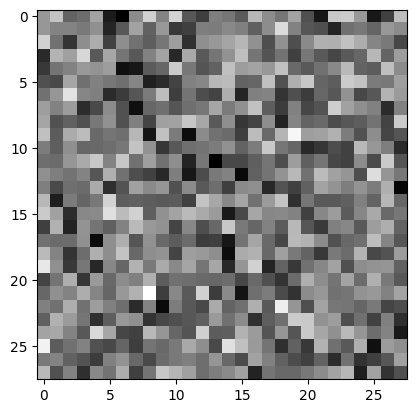

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

### The Discriminator

The discriminator is a CNN-based image classifier.

In [ ]:
def make_discriminator_model():

    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=[28,28,1]))
    model.add(layers.Dense(28 * 28 * 1))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(np.int64((28 * 28 * 1)/2)))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1))
    model.summary()

    '''
    # Mode collapse

    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    model.summary()
    '''

    '''
    # Convolutional network

    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    model.summary()
    '''


    return model

Use the (as yet untrained) discriminator to classify the generated images as real or fake. The model will be trained to output positive values for real images, and negative values for fake images.

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 784)               615440    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 392)               307720    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 392)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 393       
                                                                 
Total params: 923553 (3.52 MB)
Trainable params: 92355

## Define the loss and optimizers

Define loss functions and optimizers for both models.


In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

### Discriminator loss

This method quantifies how well the discriminator is able to distinguish real images from fakes. It compares the discriminator's predictions on real images to an array of 1s, and the discriminator's predictions on fake (generated) images to an array of 0s.

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss

    return total_loss

### Generator loss
The generator's loss quantifies how well it was able to trick the discriminator. Intuitively, if the generator is performing well, the discriminator will classify the fake images as real (or 1). Here, compare the discriminators decisions on the generated images to an array of 1s.

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

The discriminator and the generator optimizers are different since you will train two networks separately.

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

## Define the training loop


In [ ]:
EPOCHS = 100
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

The training loop begins with generator receiving a random seed as input. That seed is used to produce an image. The discriminator is then used to classify real images (drawn from the training set) and fakes images (produced by the generator). The loss is calculated for each of these models, and the gradients are used to update the generator and discriminator.

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    tot_gen_loss = 0
    tot_disc_loss = 0
    N = 0
    for image_batch in dataset:
      gen_loss, disc_loss = train_step(image_batch)
      tot_gen_loss += gen_loss
      tot_disc_loss += disc_loss
      N +=1

    # Produce images for the GIF as you go
    #display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)
    print ('Time for epoch {} is {:.2f} sec, gen_loss = {:.2f}, disc_loss = {:.2f}'.format(epoch + 1, time.time()-start, tot_gen_loss/N, tot_disc_loss/N))

  # Generate after the final epoch
  #display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

**Generate and save images**


In [ ]:
def generate_and_save_images(model, epoch, test_input):

  # Save the model every 10 epochs
  if (epoch + 1) % 10 == 0:
    # Notice `training` is set to False.
    # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

## Train the model
Call the `train()` method defined above to train the generator and discriminator simultaneously. **Note, training GANs can be tricky. It's important that the generator and discriminator do not overpower each other (e.g., that they train at a similar rate).**

At the beginning of the training, the generated images look like random noise. As training progresses, the generated digits will look increasingly real. After about 50 epochs, they resemble MNIST digits. This may take about one minute / epoch with the default settings on Colab.

Time for epoch 1 is 8.41 sec, gen_loss = 2.83, disc_loss = 0.20
Time for epoch 2 is 2.09 sec, gen_loss = 4.84, disc_loss = 0.10
Time for epoch 3 is 2.07 sec, gen_loss = 5.40, disc_loss = 0.13
Time for epoch 4 is 2.17 sec, gen_loss = 5.12, disc_loss = 0.19
Time for epoch 5 is 2.17 sec, gen_loss = 4.06, disc_loss = 0.21
Time for epoch 6 is 2.08 sec, gen_loss = 3.15, disc_loss = 0.28
Time for epoch 7 is 2.09 sec, gen_loss = 2.81, disc_loss = 0.34
Time for epoch 8 is 2.08 sec, gen_loss = 2.65, disc_loss = 0.42


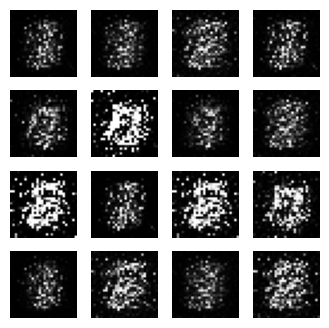

Time for epoch 9 is 2.65 sec, gen_loss = 2.43, disc_loss = 0.45
Time for epoch 10 is 2.30 sec, gen_loss = 2.30, disc_loss = 0.50
Time for epoch 11 is 2.10 sec, gen_loss = 1.99, disc_loss = 0.70
Time for epoch 12 is 2.11 sec, gen_loss = 1.88, disc_loss = 0.69
Time for epoch 13 is 2.11 sec, gen_loss = 1.84, disc_loss = 0.76
Time for epoch 14 is 2.11 sec, gen_loss = 1.97, disc_loss = 0.69
Time for epoch 15 is 2.18 sec, gen_loss = 1.92, disc_loss = 0.69
Time for epoch 16 is 2.24 sec, gen_loss = 2.01, disc_loss = 0.70
Time for epoch 17 is 2.12 sec, gen_loss = 1.81, disc_loss = 0.74
Time for epoch 18 is 2.13 sec, gen_loss = 1.93, disc_loss = 0.68


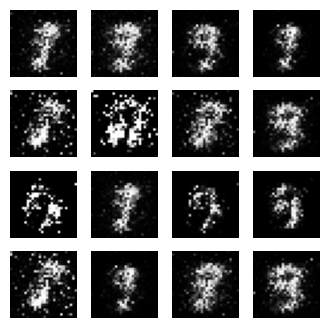

Time for epoch 19 is 2.85 sec, gen_loss = 2.04, disc_loss = 0.64
Time for epoch 20 is 2.21 sec, gen_loss = 2.15, disc_loss = 0.62
Time for epoch 21 is 2.29 sec, gen_loss = 2.26, disc_loss = 0.56
Time for epoch 22 is 2.14 sec, gen_loss = 2.22, disc_loss = 0.59
Time for epoch 23 is 2.14 sec, gen_loss = 2.51, disc_loss = 0.55
Time for epoch 24 is 2.14 sec, gen_loss = 2.19, disc_loss = 0.60
Time for epoch 25 is 2.15 sec, gen_loss = 2.17, disc_loss = 0.60
Time for epoch 26 is 2.26 sec, gen_loss = 2.44, disc_loss = 0.56
Time for epoch 27 is 2.23 sec, gen_loss = 2.40, disc_loss = 0.55
Time for epoch 28 is 2.16 sec, gen_loss = 2.36, disc_loss = 0.54


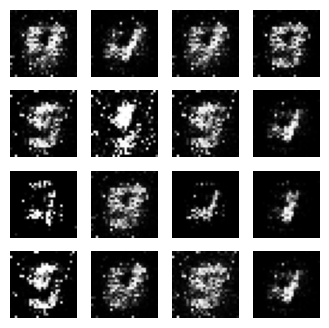

Time for epoch 29 is 2.65 sec, gen_loss = 2.24, disc_loss = 0.60
Time for epoch 30 is 2.19 sec, gen_loss = 2.43, disc_loss = 0.52
Time for epoch 31 is 2.26 sec, gen_loss = 2.57, disc_loss = 0.47
Time for epoch 32 is 2.25 sec, gen_loss = 2.54, disc_loss = 0.57
Time for epoch 33 is 2.18 sec, gen_loss = 2.44, disc_loss = 0.49
Time for epoch 34 is 2.18 sec, gen_loss = 2.54, disc_loss = 0.59
Time for epoch 35 is 2.18 sec, gen_loss = 2.39, disc_loss = 0.53
Time for epoch 36 is 2.21 sec, gen_loss = 2.26, disc_loss = 0.64
Time for epoch 37 is 2.34 sec, gen_loss = 2.34, disc_loss = 0.60
Time for epoch 38 is 2.20 sec, gen_loss = 2.17, disc_loss = 0.66


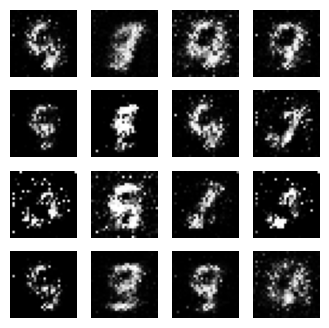

Time for epoch 39 is 2.71 sec, gen_loss = 2.20, disc_loss = 0.61
Time for epoch 40 is 2.23 sec, gen_loss = 2.19, disc_loss = 0.62
Time for epoch 41 is 2.21 sec, gen_loss = 2.35, disc_loss = 0.62
Time for epoch 42 is 2.35 sec, gen_loss = 2.40, disc_loss = 0.56
Time for epoch 43 is 2.20 sec, gen_loss = 2.40, disc_loss = 0.57
Time for epoch 44 is 2.20 sec, gen_loss = 2.56, disc_loss = 0.51
Time for epoch 45 is 2.20 sec, gen_loss = 2.49, disc_loss = 0.56
Time for epoch 46 is 2.20 sec, gen_loss = 2.42, disc_loss = 0.59
Time for epoch 47 is 2.31 sec, gen_loss = 2.37, disc_loss = 0.59
Time for epoch 48 is 2.27 sec, gen_loss = 2.42, disc_loss = 0.58


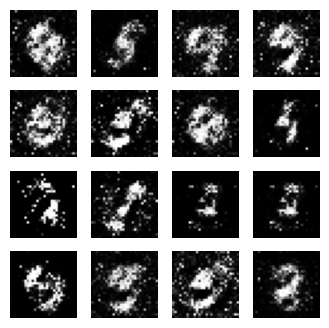

Time for epoch 49 is 2.71 sec, gen_loss = 2.41, disc_loss = 0.59
Time for epoch 50 is 2.23 sec, gen_loss = 2.56, disc_loss = 0.52
Time for epoch 51 is 2.19 sec, gen_loss = 2.61, disc_loss = 0.48
Time for epoch 52 is 2.29 sec, gen_loss = 2.56, disc_loss = 0.51
Time for epoch 53 is 2.27 sec, gen_loss = 2.75, disc_loss = 0.50
Time for epoch 54 is 2.19 sec, gen_loss = 2.89, disc_loss = 0.45
Time for epoch 55 is 2.20 sec, gen_loss = 2.64, disc_loss = 0.52
Time for epoch 56 is 2.19 sec, gen_loss = 2.58, disc_loss = 0.53
Time for epoch 57 is 2.54 sec, gen_loss = 2.61, disc_loss = 0.50
Time for epoch 58 is 2.30 sec, gen_loss = 2.60, disc_loss = 0.56


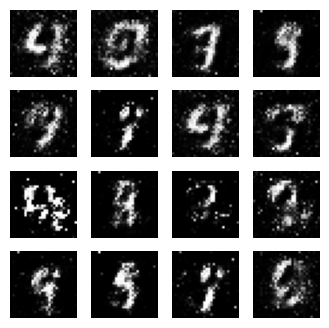

Time for epoch 59 is 2.99 sec, gen_loss = 2.62, disc_loss = 0.54
Time for epoch 60 is 2.21 sec, gen_loss = 2.51, disc_loss = 0.55
Time for epoch 61 is 2.18 sec, gen_loss = 2.53, disc_loss = 0.52
Time for epoch 62 is 2.24 sec, gen_loss = 2.60, disc_loss = 0.52
Time for epoch 63 is 2.29 sec, gen_loss = 2.51, disc_loss = 0.55
Time for epoch 64 is 2.18 sec, gen_loss = 2.48, disc_loss = 0.56
Time for epoch 65 is 2.18 sec, gen_loss = 2.52, disc_loss = 0.53
Time for epoch 66 is 2.18 sec, gen_loss = 2.55, disc_loss = 0.54
Time for epoch 67 is 2.18 sec, gen_loss = 2.50, disc_loss = 0.51
Time for epoch 68 is 2.31 sec, gen_loss = 2.53, disc_loss = 0.52


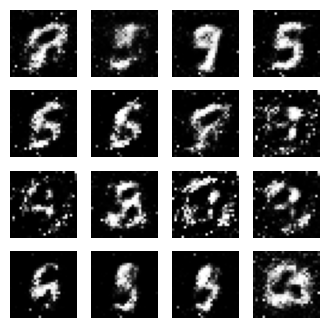

Time for epoch 69 is 2.67 sec, gen_loss = 2.72, disc_loss = 0.47
Time for epoch 70 is 2.21 sec, gen_loss = 2.56, disc_loss = 0.57
Time for epoch 71 is 2.18 sec, gen_loss = 2.59, disc_loss = 0.54
Time for epoch 72 is 2.18 sec, gen_loss = 2.69, disc_loss = 0.51
Time for epoch 73 is 2.31 sec, gen_loss = 2.83, disc_loss = 0.47
Time for epoch 74 is 2.24 sec, gen_loss = 2.58, disc_loss = 0.53
Time for epoch 75 is 2.18 sec, gen_loss = 2.66, disc_loss = 0.51
Time for epoch 76 is 2.18 sec, gen_loss = 2.57, disc_loss = 0.54
Time for epoch 77 is 2.19 sec, gen_loss = 2.71, disc_loss = 0.53
Time for epoch 78 is 2.24 sec, gen_loss = 2.54, disc_loss = 0.55


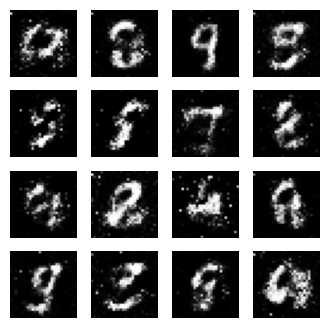

Time for epoch 79 is 2.80 sec, gen_loss = 2.60, disc_loss = 0.57
Time for epoch 80 is 2.21 sec, gen_loss = 2.64, disc_loss = 0.56
Time for epoch 81 is 2.18 sec, gen_loss = 2.61, disc_loss = 0.54
Time for epoch 82 is 2.18 sec, gen_loss = 2.55, disc_loss = 0.55
Time for epoch 83 is 2.22 sec, gen_loss = 2.63, disc_loss = 0.53
Time for epoch 84 is 2.32 sec, gen_loss = 2.52, disc_loss = 0.54
Time for epoch 85 is 2.19 sec, gen_loss = 2.47, disc_loss = 0.62
Time for epoch 86 is 2.19 sec, gen_loss = 2.49, disc_loss = 0.60
Time for epoch 87 is 2.18 sec, gen_loss = 2.47, disc_loss = 0.56
Time for epoch 88 is 2.19 sec, gen_loss = 2.65, disc_loss = 0.55


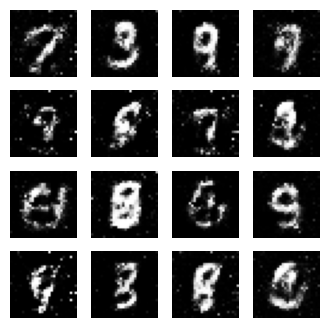

Time for epoch 89 is 2.90 sec, gen_loss = 2.52, disc_loss = 0.55
Time for epoch 90 is 2.21 sec, gen_loss = 2.48, disc_loss = 0.59
Time for epoch 91 is 2.19 sec, gen_loss = 2.36, disc_loss = 0.62
Time for epoch 92 is 2.19 sec, gen_loss = 2.45, disc_loss = 0.62
Time for epoch 93 is 2.19 sec, gen_loss = 2.50, disc_loss = 0.60
Time for epoch 94 is 2.29 sec, gen_loss = 2.31, disc_loss = 0.65
Time for epoch 95 is 2.25 sec, gen_loss = 2.23, disc_loss = 0.67
Time for epoch 96 is 2.19 sec, gen_loss = 2.38, disc_loss = 0.60
Time for epoch 97 is 2.20 sec, gen_loss = 2.30, disc_loss = 0.65
Time for epoch 98 is 2.18 sec, gen_loss = 2.30, disc_loss = 0.67


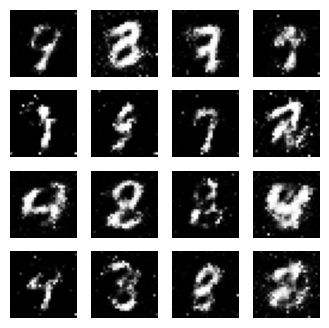

Time for epoch 99 is 3.32 sec, gen_loss = 2.31, disc_loss = 0.64
Time for epoch 100 is 2.28 sec, gen_loss = 2.31, disc_loss = 0.64


In [ ]:
train(train_dataset, EPOCHS)



---



#**Failure Modes (ways in which GANs fail)**

**Mode collapse** — i.e., learn to produce one mode
of data distribution. This happens, when discriminator performs much better than generator.

In the process of training, the generator is always trying to find the one output that seems most plausible to the discriminator.
Because of that, the discriminator’s best strategy is always to reject the output of the generator.

But if the next generation of discriminator gets stuck in a local minimum and doesn’t find its way out by getting its weights even more optimized, it’d get easy for the next generator iteration to find the most plausible output for the current discriminator.

---

How to make the above code failing? Improve discriminator by replacing the dense network by the convolutional one and remove the BatchNormalization layers from the generator.

The generator and discriminator codes leading to mode collaple are commented outin the code.




#<font color='red'> **Exercise: Please test the GAN after these modifications!**

We should get something like that, generate just one digit instead of the spectrum of different digits:

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1012.png' width=450px>


# **Deconvolutional GANs \(DCGAN\) \(Radford et al\.\, 2015\)**
https://arxiv.org/abs/1511.06434

Use for images – use convolutional DNN for both discriminator and generator

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1013.png' width=450px>



<span style="color:#03495C"> __Deconvolutional GANs \(DCGAN\)__ </span>  

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1014.png' width=450px>

* <span style="color:#0076A3"> __Based on LSUN data set__ </span>
  * <span style="color:#009DD9"> __10 scene categories__ </span>
  * <span style="color:#009DD9"> __20 object categories__ </span>
* <span style="color:#A9A100"> _[ArXiv ](https://arxiv.org/abs/1506.03365)_ </span>  <span style="color:#A9A100"> _[1506\.03365](https://arxiv.org/abs/1506.03365)_ </span>


<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1015.png' width=450px>

---

#**Generating hand\-written letters again:**

But this time we replace the dense layers in the generator and discriminator by convolutional layers (commented out in the code).






#**Generating faces**

Another DCGAN example is the code to generate new human faces from the database of celebrities photos (CELEBA - 200 000 photos) can be obtained from the Keras examples:

https://keras.io/examples/generative/dcgan_overriding_train_step/

<!---
<img src='https://i.imgur.com/h5MtQZ7l.png' width=650px>
--->


I have run this code on another server. The face image was reduced to 32x32 pixels and the number of training images reduced to 100 000 due to limitations.

* Original images:

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/Zrzut%20ekranu%202023-04-11%20130212.png' width=700px>

---

**Generation results:**

* 1-st epoch:

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/Zrzut%20ekranu%202023-04-11%20122127.png' width=700px>

* 5-th epoch:

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/Zrzut%20ekranu%202023-04-11%20122248.png' width=700px>

* 10-th epoch:

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/Zrzut%20ekranu%202023-04-11%20122717.png' width=700px>

* 15-th epoch:

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/Zrzut%20ekranu%202023-04-11%20122924.png' width=700px>

* 20-th epoch:

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/Zrzut%20ekranu%202023-04-11%20123002.png' width=700px>


* 25-th epoch:

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/Zrzut%20ekranu%202023-04-11%20123031.png' width=700px>


* 30-th epoch:

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/Zrzut%20ekranu%202023-04-11%20123100.png' width=700px>


* 50-th epoch:

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/Zrzut%20ekranu%202023-04-11%20173611.png' width=700px>


* 75-th epoch:

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/Zrzut%20ekranu%202023-04-11%20173700.png' width=700px>


* 100-th epoch:

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/Zrzut%20ekranu%202023-04-11%20173733.png' width=700px>



## **Generated faces are becoming more and more realistic!!!**

But:

* We need a lot of computing power (for that couple hours of GPU was needed).
* We need **HUGE** (100 000 !!!) photographs to train on.


---

#<font color='red'>**(DC)GAN guidelines:**

---

* All the pooling layers are replaced with strided convolutions in the discriminator and fractional strided convolution in the generator**<sup>*</sup>**.
* No fully-connected or pooling layers are used.
* Batchnorm used in both Generator and Discriminator
* **ReLu** or **LeakyReLu** activation is used for the generator for all the layers except the last layer which uses **tanh**
* Discriminator uses **LeakyReLu** for all the layers

**<sup>*</sup>** <font size="2">*Fractionally strided convolutions, sometimes referred to as deconvolutions, transpose images, typically from a minimized format to a larger one. Imagine an image that has been reduced to a 2x2 pixel format. To transpose the image up to a larger format, a fractionally strided convolution reconstructs the image's spatial resolution, then performs the convolution.*</font>


---

<font size="2"> ***source:** https://medium.com/analytics-vidhya/dcgan-tutorial-by-aniket-maurya-f6c137ef0053* </font>

---



#**Providing Images as Input to Generator**

* **Image Super\-Resolution**  (Ledig et al\.\, 2017\)  https://openaccess.thecvf.com/content_cvpr_2017/papers/Ledig_Photo-Realistic_Single_Image_CVPR_2017_paper.pdf

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1024.png' width=450px>




* **Cycle GANs** (Zhu et al\.\, 2017; arXiv:1703:10593v2 \) https://arxiv.org/abs/1703.10593v2

  Cycle GANs allow image-to-image translation given two image collections. Algorithm learns to translate an image from one collection to the other, does not require correspondence between images

  <img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1025.jpg' width=450px>

  <span style="color:#0076A3"> __Given two image collections:__ </span>
  * <span style="color:#009DD9"> __algorithm learns to translate an image from one collection to the other__ </span>
  * <span style="color:#009DD9"> __does not require corres\-pondence between images__ </span>

  **Photos to paintings:**
  <img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1026.jpg' width=450px>

  **Paintings to photos:**

  <img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1027.jpg' width=450px>

  A nice example of cycle GAN (converting horses to zebras) with some description can be found in keras examples: <br>
  https://keras.io/examples/generative/cyclegan/


* **Conditional GAN (CGAN)**

  A simple DCGAN doesn't let us control the appearance (e.g. class) of the samples we're generating. For instance, with a GAN that generates MNIST handwritten digits, a simple DCGAN wouldn't let us choose the class of digits we're generating. To be able to control what we generate, we need to condition the GAN output on a semantic input, such as the class of an image.

  During the training:
  * Latent variable is passed to the
generator and the discriminator.
  * The generator learns side information conditional
distributions, as it is able to
disentangle this from the overall
latent space.

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/Summary-of-the-Differences-Between-the-Conditional-GAN-Semi-Supervised-GAN-InfoGAN-and-AC-GAN-1024x423.png' width=350px>

  **Example:**
  
  Conditional GAN in keras examples:
  https://keras.io/examples/generative/conditional_gan/

  in which MNIST hand written digits are generated, but we can choose which class to generate.


#**Known problems with GANs:**

<span style="color:#03495C"> __Problems With Counting__ </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1039.png' width=450px>



<span style="color:#03495C"> __Problems With Perspective__ </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1040.png' width=450px>



<span style="color:#03495C"> __Problems With Global Structure__ </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1041.png' width=450px>





#**Applications of GAN**

<span style="color:#000000">In science \- speed up generation of simulated data – new simulated event look similar to the once already simulated/collected data\.</span>

<span style="color:#000000">Overview of GAN applications:</span>

<span style="color:#000000">[https://machinelearningmastery\.com/impressive\-applications\-of\-generative\-adversarial\-networks/](https://machinelearningmastery.com/impressive-applications-of-generative-adversarial-networks/)</span>



# <font color='green'> **Some nice examples**


#**Add colors to pictures \- DeOldify**

<span style="color:#000000">[https://github\.com/jantic/DeOldify](https://github.com/jantic/DeOldify)</span>  <span style="color:#000000"> </span>

<span style="color:#000000">An open code project\, adds color to pictures and to the movies\. You can run it by yourself on Google Colab</span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1029.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1030.png' width=450px>

Prof\. Henryk Niewodniczański

Founder of our Institute

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1031.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1032.png' width=450px>

---



## **Let us play with DeOldify**

* Open the github repository of DeOldify and run the code on Google Colab https://colab.research.google.com/github/jantic/DeOldify/blob/master/ImageColorizerColabStable.ipynb

* Give this photo as an input:

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/tramwaj_xlarge.jpg' width=500px>

https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/tramwaj_xlarge.jpg

* DeOldify it:

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/tramwa_xlarge_colored.png' width=500px>

* Think what is wrong and why?

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/tramwaj_new.jpg' width=400px>


#**Make art with GAN\!\!\!**

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1033.png' width=450px>

<span style="color:#FFFFFF"> __Sold for a reported__ </span>  <span style="color:#FF0000"> __for $432\,500__ </span>  <span style="color:#FFFFFF"> __at an auction\!\!\!__ </span>

"Edmond de Belamy" is part of a fictitious family created by a "generative adversarial network\," of which there's ten other paintings\. "Edmond" is one of the most striking of the paintings\, and will likely become an important part of art history going forward thanks to its huge selling price\. The generator behind the painting created new portraits based on 15\,000 from the last 600 years\, taking existing art and crafting something wholly original and quite alien\.

---

#**Create a new Rembrandt painting**
based on all of his works: </span>  <span style="color:#000000">[https://www\.nextrembrandt\.com/](https://www.nextrembrandt.com/)</span>  <span style="color:#000000"> </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1034.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1035.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture9/MachineLearning2020_1036.png' width=450px>



# <font color='green'> **Make your own art**

[List of Top 10 Text-to-Image Generators](https://startuptalky.com/best-text-to-image-generator/)

* Photosonic
* Jasper.ai Art
* Dall-E
* Fotor
* Midjourney
* Nightcafe
* Canva
* Stable Diffusion
* Dreamstudio
* StarryAI



## <img src='https://tse2.mm.bing.net/th/id/OIP.bYtQsZlspQofrAQn4-gzuwAAAA?pid=ImgDet&rs=1' width=100px> **Let's play with [Starry AI](https://starryai.com/)**   


* **Generate art:**

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/MarcChagall_1.png' width=450px>

Marc Chagall Angel Flying Over City At Night

---

* **Generate realistic photo:**

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/1za91ppt.png' width=450px>

A Kraków Tram Stopping At The Railway Station

We have used this colored photo as an initial image:

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/tramwaj_colored.png' width=250px>

---


* let's try with another initial image (blue tramway):

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/tramwaj_new.jpg' width=250px>

and we get a **blue Cracow tram**:

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2023/main/images/tram_blue.webp' width=450px>









---



---



---



# <font color='green'> **Reinforcement learning**

##**Definition**
Reinforcement Learning (RL) is the science of decision making. It is about learning the optimal behavior in an environment to obtain maximum reward. This optimal behavior is learned through interactions with the environment and observations of how it responds, similar to children exploring the world around them and learning the actions that help them achieve a goal.

In the absence of a supervisor, the learner must independently discover the sequence of actions that maximize the reward. This discovery process is akin to a trial-and-error search. The quality of actions is measured by not just the immediate reward they return, but also the delayed reward they might fetch. As it can learn the actions that result in eventual success in an unseen environment without the help of a supervisor, reinforcement learning is a very powerful algorithm.

##**How Does Reinforcement Learning Work?**
The Reinforcement Learning problem involves an agent exploring an unknown environment to achieve a goal. RL is based on the hypothesis that all goals can be described by the maximization of expected cumulative reward. The agent must learn to sense and perturb the state of the environment using its actions to derive maximal reward. The formal framework for RL borrows from the problem of optimal control of Markov Decision Processes (MDP).

The main elements of an RL system are:

1. The agent or the learner
2. The environment the agent interacts with
3. The policy that the agent follows to take actions
4. The reward signal that the agent observes upon taking actions

A useful abstraction of the reward signal is the value function, which faithfully captures the ‘goodness’ of a state. While the reward signal represents the immediate benefit of being in a certain state, the value function captures the cumulative reward that is expected to be collected from that state on, going into the future. The objective of an RL algorithm is to discover the action policy that maximizes the average value that it can extract from every state of the system.

<img src='https://images.synopsys.com/is/image/synopsys/reinforcement-learningV1-02?qlt=82&wid=1200&ts=1680107783898&$responsive$&fit=constrain&dpr=off' width=500px>

## **Examples of Reinforcement Learning**
Any real-world problem where an agent must interact with an uncertain environment to meet a specific goal is a potential application of RL. Here are a few RL success stories:

1. **Robotics.** Robots with pre-programmed behavior are useful in structured environments, such as the assembly line of an automobile manufacturing plant, where the task is repetitive in nature. In the real world, where the response of the environment to the behavior of the robot is uncertain, pre-programming accurate actions is nearly impossible. In such scenarios, RL provides an efficient way to build general-purpose robots. It has been successfully applied to robotic path planning, where a robot must find a short, smooth, and navigable path between two locations, void of collisions and compatible with the dynamics of the robot.

2. **AlphaGo.** One of the most complex strategic games is a 3,000-year-old Chinese board game called Go. Its complexity stems from the fact that there are 10^270 possible board combinations, several orders of magnitude more than the game of chess. In 2016, an RL-based Go agent called AlphaGo defeated the greatest human Go player. Much like a human player, it learned by experience, playing thousands of games with professional players. The latest RL-based Go agent has the capability to learn by playing against itself, an advantage that the human player doesn’t have.

3. **Autonomous Driving.** An autonomous driving system must perform multiple perception and planning tasks in an uncertain environment. Some specific tasks where RL finds application include vehicle path planning and motion prediction. Vehicle path planning requires several low and high-level policies to make decisions over varying temporal and spatial scales. Motion prediction is the task of predicting the movement of pedestrians and other vehicles, to understand how the situation might develop based on the current state of the environment.

<h2><strong>How Actor-Critic works:</strong></h2>
<p>Imagine you play a video game with a friend that provides you some feedback. You're the Actor, and your friend is the Critic:</p>
<p><img class="img-fluid" style="display: block; margin-left: auto; margin-right: auto;" src="https://pylessons.com/media/Tutorials/Reinforcement-learning-tutorial/A2C-reinforcement-learning/09_A2C-reinforcement-learning.png" alt="" width="949" height="534" />

In the beginning, you don't know how to play, so you try some action randomly. The Critic observes your action and provides feedback.
<p>In the Actor-Critic Methods:</p>
<ul>
<li>The "Critic" estimates the value function. This could be the action-value (the Q value) or state-value (the V value).</li>
<li>Critic: Q-learning algorithm that critiques the action that the Actor selected, providing feedback on how to adjust. It can take advantage of efficiency tricks in Q-learning, such as memory replay.</li>
</ul>
<p>We update both the Critic network and the Value network at each update step.</p>
<p>Intuitively, this means how better it is to take a specific action than the average general action at the given state. So, using the Value function as the baseline function, we subtract the Q value term with the Value.

# Actor Critic Method

**Author:** [Apoorv Nandan](https://twitter.com/NandanApoorv)<br>
Modified by Marcin Wolter<br>
**Date created:** 2020/05/13<br>
**Last modified:** 2023/04/16<br>
**Description:** Implement Actor Critic Method in CartPole environment.

## Introduction

This script shows an implementation of Actor Critic method on CartPole-V0 environment.

### Actor Critic Method

As an agent takes actions and moves through an environment, it learns to map
the observed state of the environment to two possible outputs:

1. Recommended action: A probability value for each action in the action space.
   The part of the agent responsible for this output is called the **actor**.
2. Estimated rewards in the future: Sum of all rewards it expects to receive in the
   future. The part of the agent responsible for this output is the **critic**.

Agent and Critic learn to perform their tasks, such that the recommended actions
from the actor maximize the rewards.

### CartPole-V1

A pole is attached to a cart placed on a frictionless track. The agent has to apply
force to move the cart. It is rewarded for every time step the pole
remains upright. The agent, therefore, must learn to keep the pole from falling over.

### References

- [CartPole](http://www.derongliu.org/adp/adp-cdrom/Barto1983.pdf)
- [CartPole in GYM](https://www.gymlibrary.dev/environments/classic_control/cart_pole/ )
- [Actor Critic Method](https://hal.inria.fr/hal-00840470/document)


# **Cart Pole**
<figure class="align-default" id="id1">
<a class="reference internal image-reference" href="https://www.gymlibrary.dev/_images/cart_pole.gif"><img alt="https://www.gymlibrary.dev/_images/cart_pole.gif" src="https://www.gymlibrary.dev/_images/cart_pole.gif" style="width: 200px;" /></a>
</figure>
<p>This environment is part of the <a href='..'>Classic Control environments</a>. Please read that page first for general information.</p>
<div class="table-wrapper colwidths-auto docutils container">
<table class="docutils align-default">
<thead>
<tr class="row-odd"><th class="head"><p></p></th>
<th class="head"><p></p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>Action Space</p></td>
<td><p>Discrete(2)</p></td>
</tr>
<tr class="row-odd"><td><p>Observation Shape</p></td>
<td><p>(4,)</p></td>
</tr>
<tr class="row-even"><td><p>Observation High</p></td>
<td><p>[4.8   inf 0.42  inf]</p></td>
</tr>
<tr class="row-odd"><td><p>Observation Low</p></td>
<td><p>[-4.8   -inf -0.42  -inf]</p></td>
</tr>
<tr class="row-even"><td><p>Import</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">gym.make(&quot;CartPole-v1&quot;)</span></code></p></td>
</tr>
</tbody>
</table>
</div>
<section id="description">
<h2>Description</h2>
<p>This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson in
<a class="reference external" href="https://ieeexplore.ieee.org/document/6313077">“Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem”</a>.
A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track.
The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces
in the left and right direction on the cart.</p>
</section>
<section id="action-space">
<h2>Action Space</h2>
<p>The action is a <code class="docutils literal notranslate"><span class="pre">ndarray</span></code> with shape <code class="docutils literal notranslate"><span class="pre">(1,)</span></code> which can take values <code class="docutils literal notranslate"><span class="pre">{0,</span> <span class="pre">1}</span></code> indicating the direction
of the fixed force the cart is pushed with.</p>
<div class="table-wrapper colwidths-auto docutils container">
<table class="docutils align-default">
<thead>
<tr class="row-odd"><th class="head"><p>Num</p></th>
<th class="head"><p>Action</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>0</p></td>
<td><p>Push cart to the left</p></td>
</tr>
<tr class="row-odd"><td><p>1</p></td>
<td><p>Push cart to the right</p></td>
</tr>
</tbody>
</table>
</div>
<p><strong>Note</strong>: The velocity that is reduced or increased by the applied force is not fixed and it depends on the angle
the pole is pointing. The center of gravity of the pole varies the amount of energy needed to move the cart underneath it</p>
</section>
<section id="observation-space">
<h2>Observation Space</h2>
<p>The observation is a <code class="docutils literal notranslate"><span class="pre">ndarray</span></code> with shape <code class="docutils literal notranslate"><span class="pre">(4,)</span></code> with the values corresponding to the following positions and velocities:</p>
<div class="table-wrapper colwidths-auto docutils container">
<table class="docutils align-default">
<thead>
<tr class="row-odd"><th class="head"><p>Num</p></th>
<th class="head"><p>Observation</p></th>
<th class="head"><p>Min</p></th>
<th class="head"><p>Max</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>0</p></td>
<td><p>Cart Position</p></td>
<td><p>-4.8</p></td>
<td><p>4.8</p></td>
</tr>
<tr class="row-odd"><td><p>1</p></td>
<td><p>Cart Velocity</p></td>
<td><p>-Inf</p></td>
<td><p>Inf</p></td>
</tr>
<tr class="row-even"><td><p>2</p></td>
<td><p>Pole Angle</p></td>
<td><p>~ -0.418 rad (-24°)</p></td>
<td><p>~ 0.418 rad (24°)</p></td>
</tr>
<tr class="row-odd"><td><p>3</p></td>
<td><p>Pole Angular Velocity</p></td>
<td><p>-Inf</p></td>
<td><p>Inf</p></td>
</tr>
</tbody>
</table>
</div>
<p><strong>Note:</strong> While the ranges above denote the possible values for observation space of each element,
it is not reflective of the allowed values of the state space in an unterminated episode. Particularly:</p>
<ul class="simple">
<li><p>The cart x-position (index 0) can be take values between <code class="docutils literal notranslate"><span class="pre">(-4.8,</span> <span class="pre">4.8)</span></code>, but the episode terminates
if the cart leaves the <code class="docutils literal notranslate"><span class="pre">(-2.4,</span> <span class="pre">2.4)</span></code> range.</p></li>
<li><p>The pole angle can be observed between  <code class="docutils literal notranslate"><span class="pre">(-.418,</span> <span class="pre">.418)</span></code> radians (or <strong>±24°</strong>), but the episode terminates
if the pole angle is not in the range <code class="docutils literal notranslate"><span class="pre">(-.2095,</span> <span class="pre">.2095)</span></code> (or <strong>±12°</strong>)</p></li>
</ul>
</section>
<section id="rewards">
<h2><b>Rewards</b></h2>
<p><b>Since the goal is to keep the pole upright for as long as possible, a reward of <code class="docutils literal notranslate"><span class="pre">+1</span></code> for every step taken,
including the termination step, is allotted. The threshold for rewards is 475 for v1.</b></p>
</section>
<section id="starting-state">
<h2>Starting State</h2>
<p>All observations are assigned a uniformly random value in <code class="docutils literal notranslate"><span class="pre">(-0.05,</span> <span class="pre">0.05)</span></code></p>
</section>
<section id="episode-end">
<h2>Episode End</h2>
<p>The episode ends if any one of the following occurs:</p>
<ol class="arabic simple">
<li><p>Termination: Pole Angle is greater than ±12°</p></li>
<li><p>Termination: Cart Position is greater than ±2.4 (center of the cart reaches the edge of the display)</p></li>
<li><p>Truncation: Episode length is greater than 500 (200 for v0)</p></li>
</ol>
</section>
<section id="arguments">
<h2>Arguments</h2>
<div class="highlight-default notranslate"><div class="highlight"><pre><span></span><span class="n">gym</span><span class="o">.</span><span class="n">make</span><span class="p">(</span><span class="s1">&#39;CartPole-v1&#39;</span><span class="p">)</span>
</pre></div>
</div>
<p>No additional arguments are currently supported.</p>
</section>
</section>

## Setup


In [ ]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from gym import wrappers
from gym.wrappers.record_video import RecordVideo
import os
import matplotlib.pyplot as plt
from IPython import display


In [ ]:

# Configuration parameters for the whole setup
seed = 42
gamma = 0.99  # Discount factor for past rewards
max_steps_per_episode = 10000
env = gym.make("CartPole-v1")  # Create the environment  , render_mode='rgb_array'
env.reset(seed=seed)
eps = np.finfo(np.float32).eps.item()  # Smallest number such that 1.0 + eps != 1.0
print("eps = ",eps)

eps =  1.1920928955078125e-07


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


## Implement Actor Critic network

This network learns two functions:

1. **Actor:** This takes as input the state of our environment and returns a
probability value for each action in its action space.
2. **Critic:** This takes as input the state of our environment and returns
an estimate of total rewards in the future.

In our implementation, they share the initial layer.


In [ ]:
num_inputs = 4    # four parameters describing the cart state
num_actions = 2   # move the cart left or right
num_hidden = 128

inputs = layers.Input(shape=(num_inputs,))
common = layers.Dense(num_hidden, activation="relu")(inputs)
action = layers.Dense(num_actions, activation="softmax")(common)
critic = layers.Dense(1)(common)

model = keras.Model(inputs=inputs, outputs=[action, critic])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 128)                  640       ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 2)                    258       ['dense[0][0]']               
                                                                                                  
 dense_2 (Dense)             (None, 1)                    129       ['dense[0][0]']               
                                                                                              

In [ ]:
def make_video(i, env, model):

    video = VideoRecorder(env, 'final_'+str(i)+'.mp4')

    steps = 0
    done = False
    state = env.reset()
    while not done:
        env.render(mode='rgb_array')
        video.capture_frame()
        # Predict action probabilities and estimated future rewards
        # from environment state
        state = tf.convert_to_tensor(state)
        state = tf.expand_dims(state, 0)
        action_probs, critic_value = model(state)
        # Sample action from action probability distribution
        action = np.random.choice(num_actions, p=np.squeeze(action_probs))
        state, reward, done, _ = env.step(action)
        steps += 1

    print("Testing steps: {}: ".format(steps))
    video.close()


## Train


In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
huber_loss = keras.losses.Huber()  # see https://keras.io/api/losses/regression_losses/#huber-class
action_probs_history = []
critic_value_history = []
rewards_history = []
running_reward = 0
episode_count = 0

from gym.wrappers.monitoring.video_recorder import VideoRecorder
video = VideoRecorder(env, 'training.mp4')
while True:  # Run until solved

    state = env.reset()

    episode_reward = 0
    with tf.GradientTape() as tape:
        for timestep in range(1, max_steps_per_episode):
            # env.render(); Adding this line would show the attempts
            # of the agent in a pop up window.
            env.render(mode='rgb_array')
            video.capture_frame()  # capture the video frame

            state = tf.convert_to_tensor(state)
            state = tf.expand_dims(state, 0)

            # Predict action probabilities and estimated future rewards
            # from environment state
            action_probs, critic_value = model(state)
            critic_value_history.append(critic_value[0, 0])

            # Sample action from action probability distribution
            action = np.random.choice(num_actions, p=np.squeeze(action_probs))
            action_probs_history.append(tf.math.log(action_probs[0, action]))

            # Apply the sampled action in our environment
            state, reward, done, _ = env.step(action)
            rewards_history.append(reward)
            episode_reward += reward

            if done:
                break

        # Update running reward to check condition for solving
        running_reward = 0.05 * episode_reward + (1 - 0.05) * running_reward

        # Calculate expected value from rewards
        # - At each timestep what was the total reward received after that timestep
        # - Rewards in the past are discounted by multiplying them with gamma
        # - These are the labels for our critic
        returns = []
        discounted_sum = 0
        for r in rewards_history[::-1]:
            discounted_sum = r + gamma * discounted_sum
            returns.insert(0, discounted_sum)

        # Normalize
        returns = np.array(returns)
        returns = (returns - np.mean(returns)) / (np.std(returns) + eps)
        returns = returns.tolist()

        # Calculating loss values to update our network
        history = zip(action_probs_history, critic_value_history, returns)
        actor_losses = []
        critic_losses = []
        for log_prob, value, ret in history:
            # At this point in history, the critic estimated that we would get a
            # total reward = `value` in the future. We took an action with log probability
            # of `log_prob` and ended up recieving a total reward = `ret`.
            # The actor must be updated so that it predicts an action that leads to
            # high rewards (compared to critic's estimate) with high probability.
            diff = ret - value
            actor_losses.append(-log_prob * diff)  # actor loss

            # The critic must be updated so that it predicts a better estimate of
            # the future rewards.
            critic_losses.append(
                huber_loss(tf.expand_dims(value, 0), tf.expand_dims(ret, 0))
            )

        # Backpropagation
        loss_value = sum(actor_losses) + sum(critic_losses)
        grads = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # Clear the loss and reward history
        action_probs_history.clear()
        critic_value_history.clear()
        rewards_history.clear()

    # Log details
    episode_count += 1
    if episode_count % 10 == 0:
        template = "running reward: {:.2f} at episode {}"
        print(template.format(running_reward, episode_count))

        make_video(episode_count, env, model)


    if running_reward > 195: # 195:  # Condition to consider the task solved
        print("Solved at episode {}!".format(episode_count))
        video.close()
        break




/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadloc

running reward: 13.26 at episode 10


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://ww

Testing steps: 26: 
running reward: 34.93 at episode 20


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://ww

Testing steps: 30: 
running reward: 38.94 at episode 30


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://ww

Testing steps: 23: 
running reward: 31.29 at episode 40


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://ww

Testing steps: 15: 
running reward: 31.79 at episode 50


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://ww

Testing steps: 29: 
running reward: 35.59 at episode 60


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://ww

Testing steps: 25: 
running reward: 56.68 at episode 70


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://ww

Testing steps: 46: 
running reward: 66.90 at episode 80


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://ww

Testing steps: 74: 
running reward: 65.15 at episode 90


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://ww

Testing steps: 43: 
running reward: 55.99 at episode 100


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://ww

Testing steps: 53: 
running reward: 58.44 at episode 110


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://ww

Testing steps: 78: 
running reward: 80.70 at episode 120


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://ww

Testing steps: 311: 
running reward: 189.98 at episode 130


/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://ww

Testing steps: 178: 
Solved at episode 131!


### **Record video after training**

In [ ]:
make_video(episode_count, env, model)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment CartPole-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with mult

Testing steps: 232: 


# **So, we have trained the robot!!!**

###**Film showing the training of a robot:**

[![Blinking LEDs](http://img.youtube.com/vi/n2gE7n11h1Y/0.jpg)](https://www.youtube.com/watch?v=n2gE7n11h1Y "Blinking LEDs")

#<font color='green'> **Summary:**

* <span style="color:#000000">Many new methods were developed recently\.</span>

* <span style="color:#000000">Machine Learning approach becomes to be used not only for classification\, but also for generative tasks\.</span>

* <span style="color:#000000">Each month new application appear\! </span>


# <font color = green> **Next and the last lecture**

* Another generative algorithm Stable Diffusion - generation of images from noise using autoencoders.